In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
import tensorflow as tf 

## intro 

- the goal is to create the parameters `a` and `b` for the equation `y = a*x+b` with simple NN using GD optimizer 


### create a trivial data 

In [2]:
x = np.linspace(-10,10,10) + np.random.uniform(-10.5,10.5,10)
y = 5.3 * x + 20.091

### Variables 

In [3]:
a = tf.Variable(0.8)
b = tf.Variable(0.4)

### cost function 

In [4]:
error = 0 
for xi,yi in zip(x,y):
    y_hat = a* xi + b
    error += (y_hat - yi)**2

### optimizer 

In [5]:
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
# train = optimizer.minimize(error)
# init = tf.global_variables_initializer()


- use this for clipping parameters for avoiding the gradients exploiding 

In [ ]:

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
gvs = optimizer.compute_gradients(error)
capped_gvs = [(tf.clip_by_value(grad, -100., 100.), var) for grad, var in gvs]
train = optimizer.apply_gradients(capped_gvs)
init = tf.global_variables_initializer()

### run session with animating  

<IPython.core.display.Javascript object>


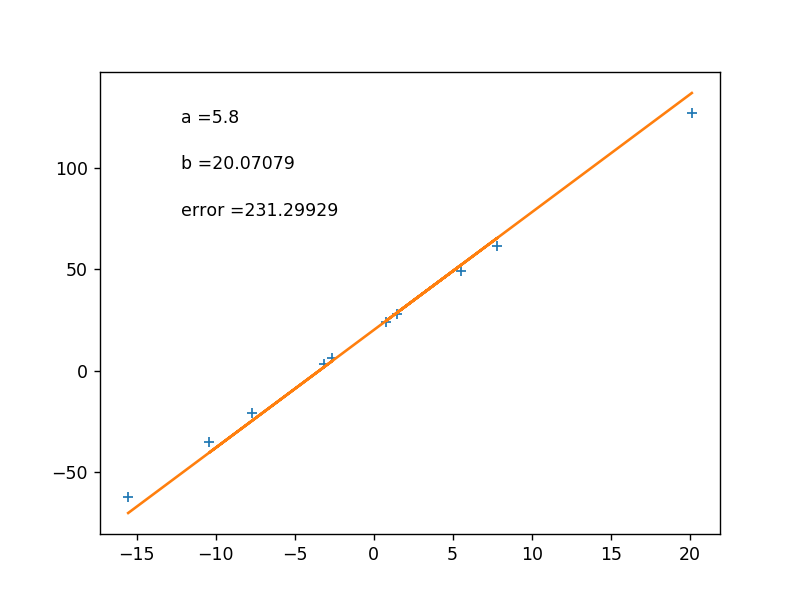

In [6]:
%matplotlib notebook

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
a_f = 1 
b_f = 0 
c_f = 0 
def animate(i,train,a,b,sess):
    global a_f
    global b_f
    global c_f
    ax1.clear()
    ax1.plot(x,y,'+');
    ax1.plot(x,a_f*x + b_f);
    ax1.text(0.13, 0.9,'a ='+str(a_f), ha='left', va='center', transform=ax1.transAxes)
    ax1.text(0.13, 0.8,'b ='+str(b_f), ha='left', va='center', transform=ax1.transAxes)
    ax1.text(0.13, 0.7,'error ='+str(sess.run(error)), ha='left', va='center', transform=ax1.transAxes)
    
    sess.run(train)
    a_f, b_f = sess.run([a,b])  
    

In [7]:
sess = tf.Session()
sess.run(init)
ani = animation.FuncAnimation(fig, animate, fargs=(train,a,b,sess),interval = 1)
plt.show()


### limitations 

- why when decreasing the learning rate to (say) 0.01 the parameters values become `nan` 